In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

import os
import time
import logging
from scipy.sparse import csr_matrix
from cmfrec import CMF
import numpy as np, pandas as pd, pickle

from utils import binarize, show_matrix

In [2]:
k = 50
lambda_ = 10
maxiter = 800

# Loading ml-1m

In [3]:
root = os.path.abspath("../../cmfrec/example")

ratings = pickle.load(open(os.path.join(root, "ratings.p"), "rb"))
item_sideinfo_pca = pickle.load(open(os.path.join(root, "item_sideinfo_pca.p"), "rb"))
user_side_info = pickle.load(open(os.path.join(root, "user_side_info.p"), "rb"))
movie_id_to_title = pickle.load(open(os.path.join(root, "movie_id_to_title.p"), "rb"))

# cmf-1, means

In [15]:
R = csr_matrix((ratings['Rating'], (ratings['UserId'], ratings['ItemId'])))
# R = binarize(R)

model = CMF(method="als", k=k, lambda_=lambda_, verbose=False, maxiter=maxiter)
model.fit(R)

Collective matrix factorization model
(explicit-feedback variant)


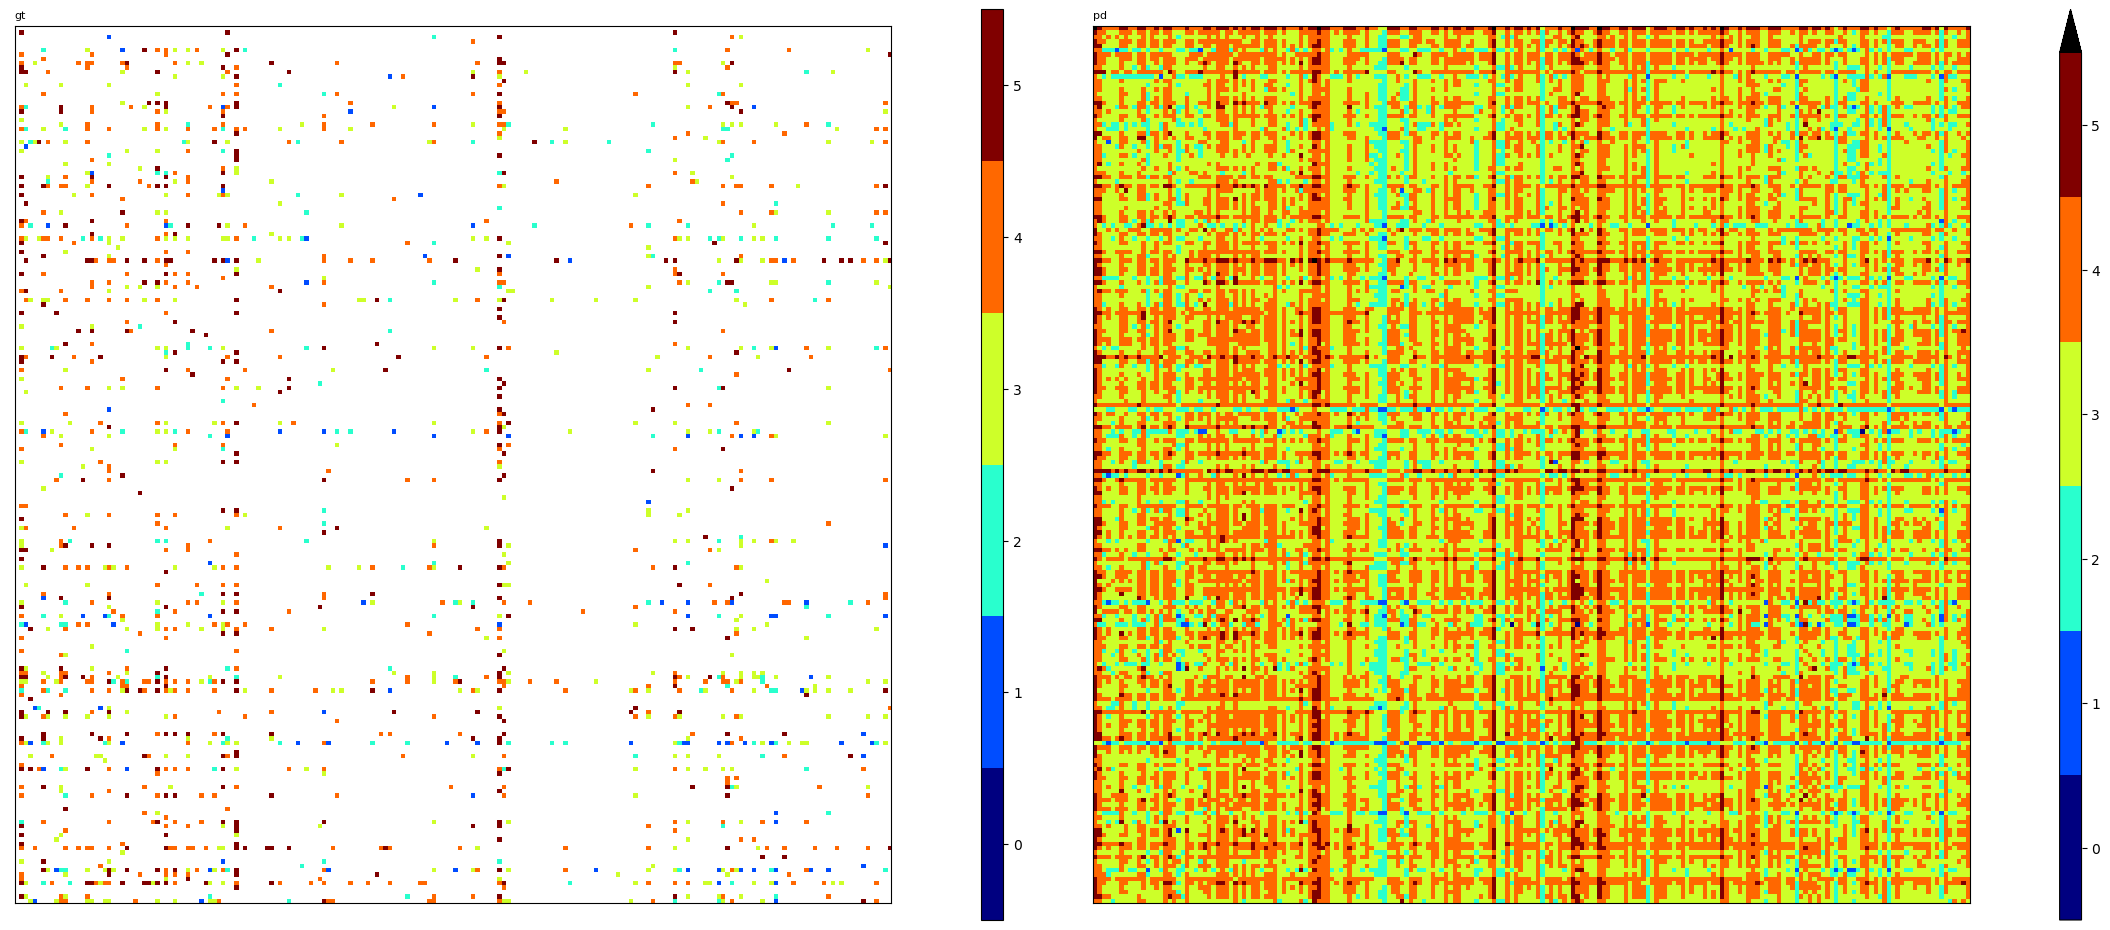

In [16]:
A, B = model.A_, model.B_
a, b, miu = model.user_bias_, model.item_bias_, model.glob_mean_

P = A @ B.T
for r in range(P.shape[0]):
    P[r, :] += a[r]
for c in range(P.shape[1]):
    P[:, c] += b[c]
P += miu

settings = [(R[:200, :200], [0, 0], 'gt'), (P[:200, :200], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[0, 5], discrete=True, center=True)

# cmf-1

In [18]:
R = csr_matrix((ratings['Rating'], (ratings['UserId'], ratings['ItemId'])))
# R = binarize(R)

model = CMF(method="als", k=k, lambda_=lambda_, verbose=False, maxiter=maxiter, user_bias=False, item_bias=False, center=False)
model.fit(R)

Collective matrix factorization model
(explicit-feedback variant)


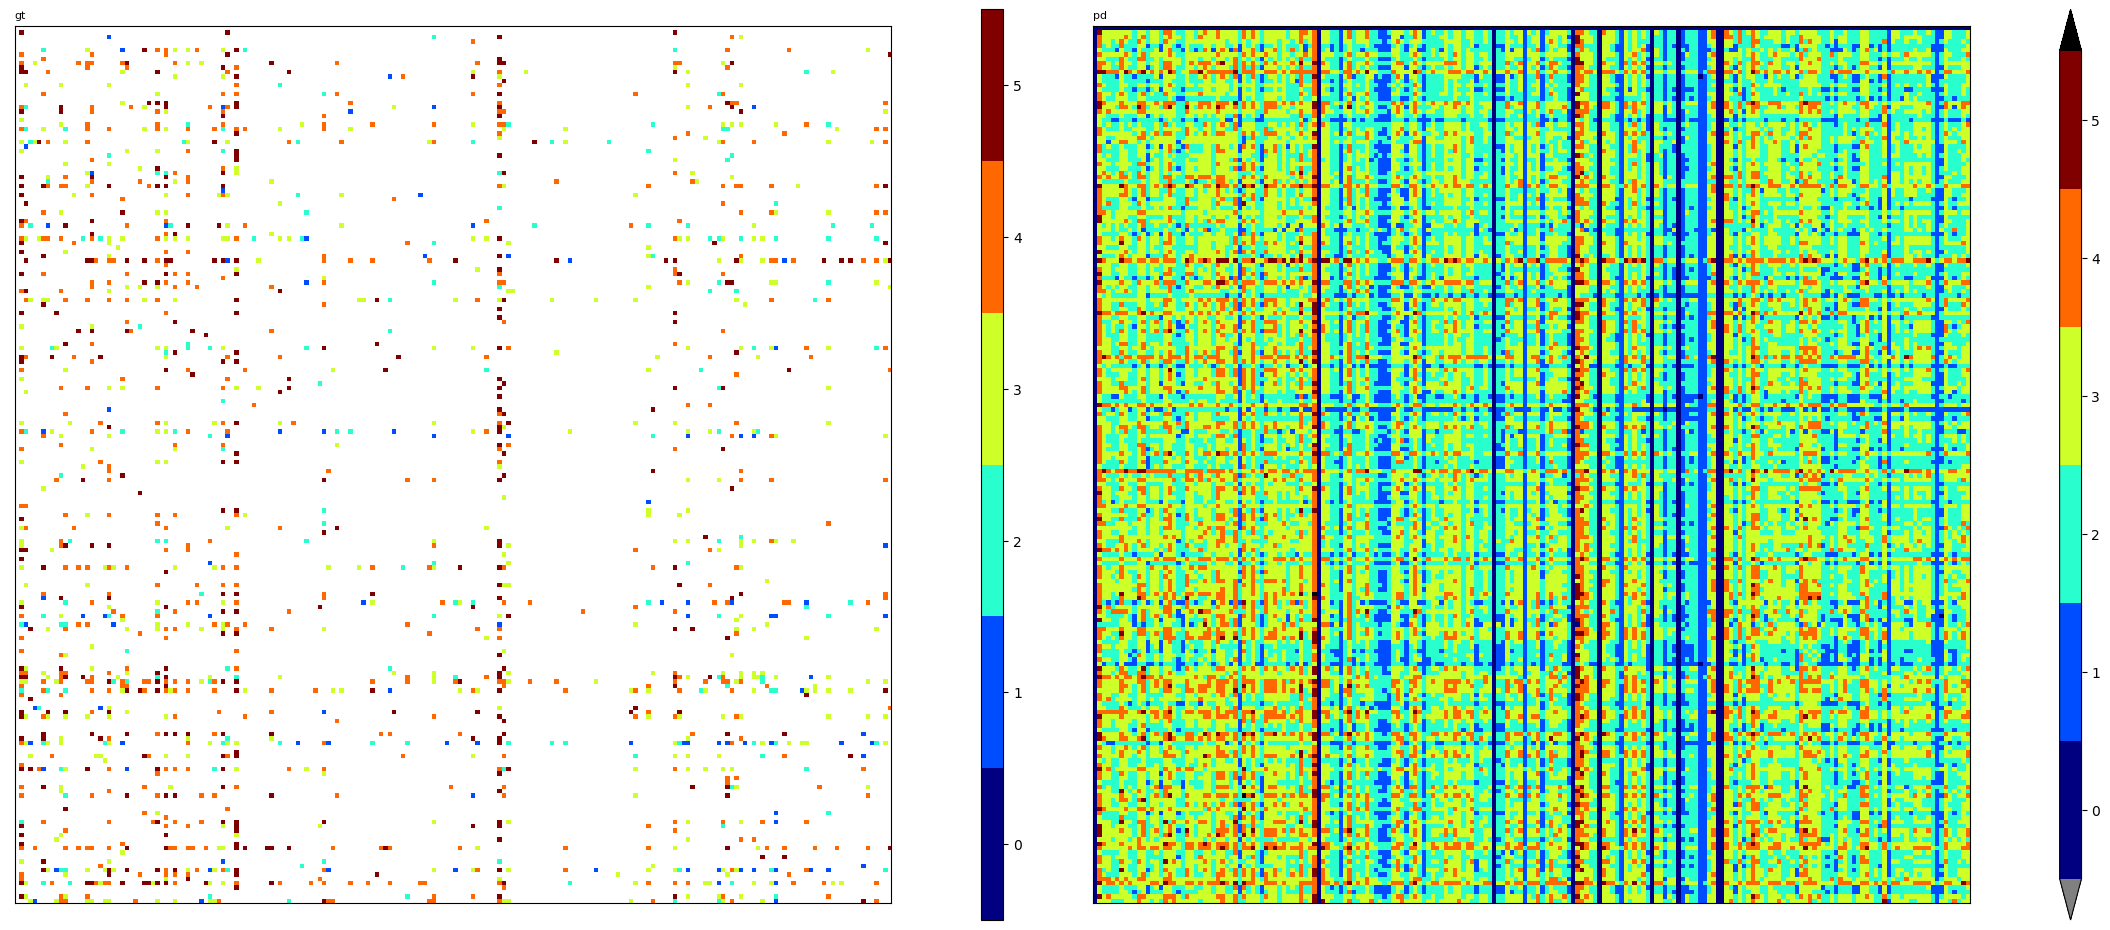

In [21]:
A, B = model.A_, model.B_
# a, b, miu = model.user_bias_, model.item_bias_, model.glob_mean_

P = A @ B.T

settings = [(R[:200, :200], [0, 0], 'gt'), (P[:200, :200], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[0, 5], discrete=True, center=True)

# cmf-1, binary, als, mean

In [43]:
R = csr_matrix((ratings['Rating'], (ratings['UserId'], ratings['ItemId'])))
R = binarize(R)

model = CMF(method="als", k=k, lambda_=lambda_, verbose=False, maxiter=maxiter)
model.fit(R)

Collective matrix factorization model
(explicit-feedback variant)


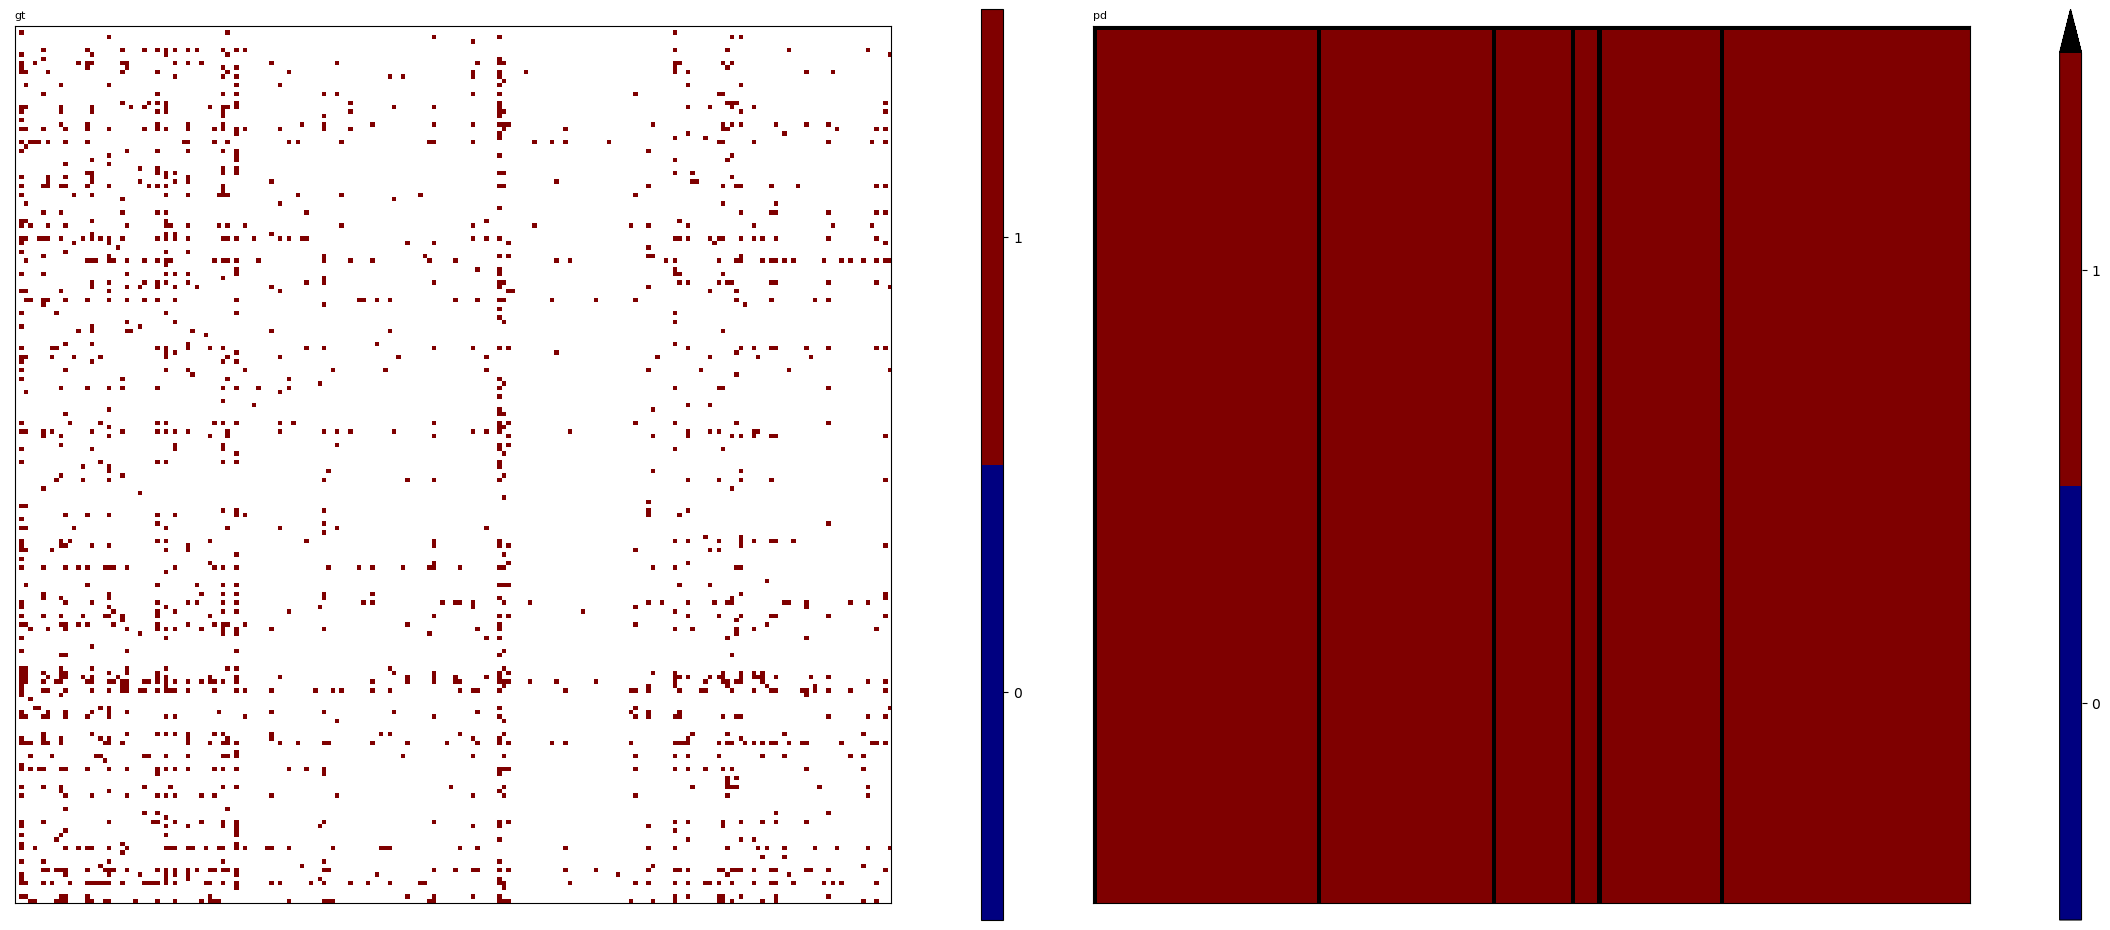

In [44]:
A, B = model.A_, model.B_
a, b, miu = model.user_bias_, model.item_bias_, model.glob_mean_

P = A @ B.T
for r in range(P.shape[0]):
    P[r, :] += a[r]
for c in range(P.shape[1]):
    P[:, c] += b[c]
P += miu

settings = [(R[:200, :200], [0, 0], 'gt'), (P[:200, :200], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[0, 1], discrete=True, center=True)

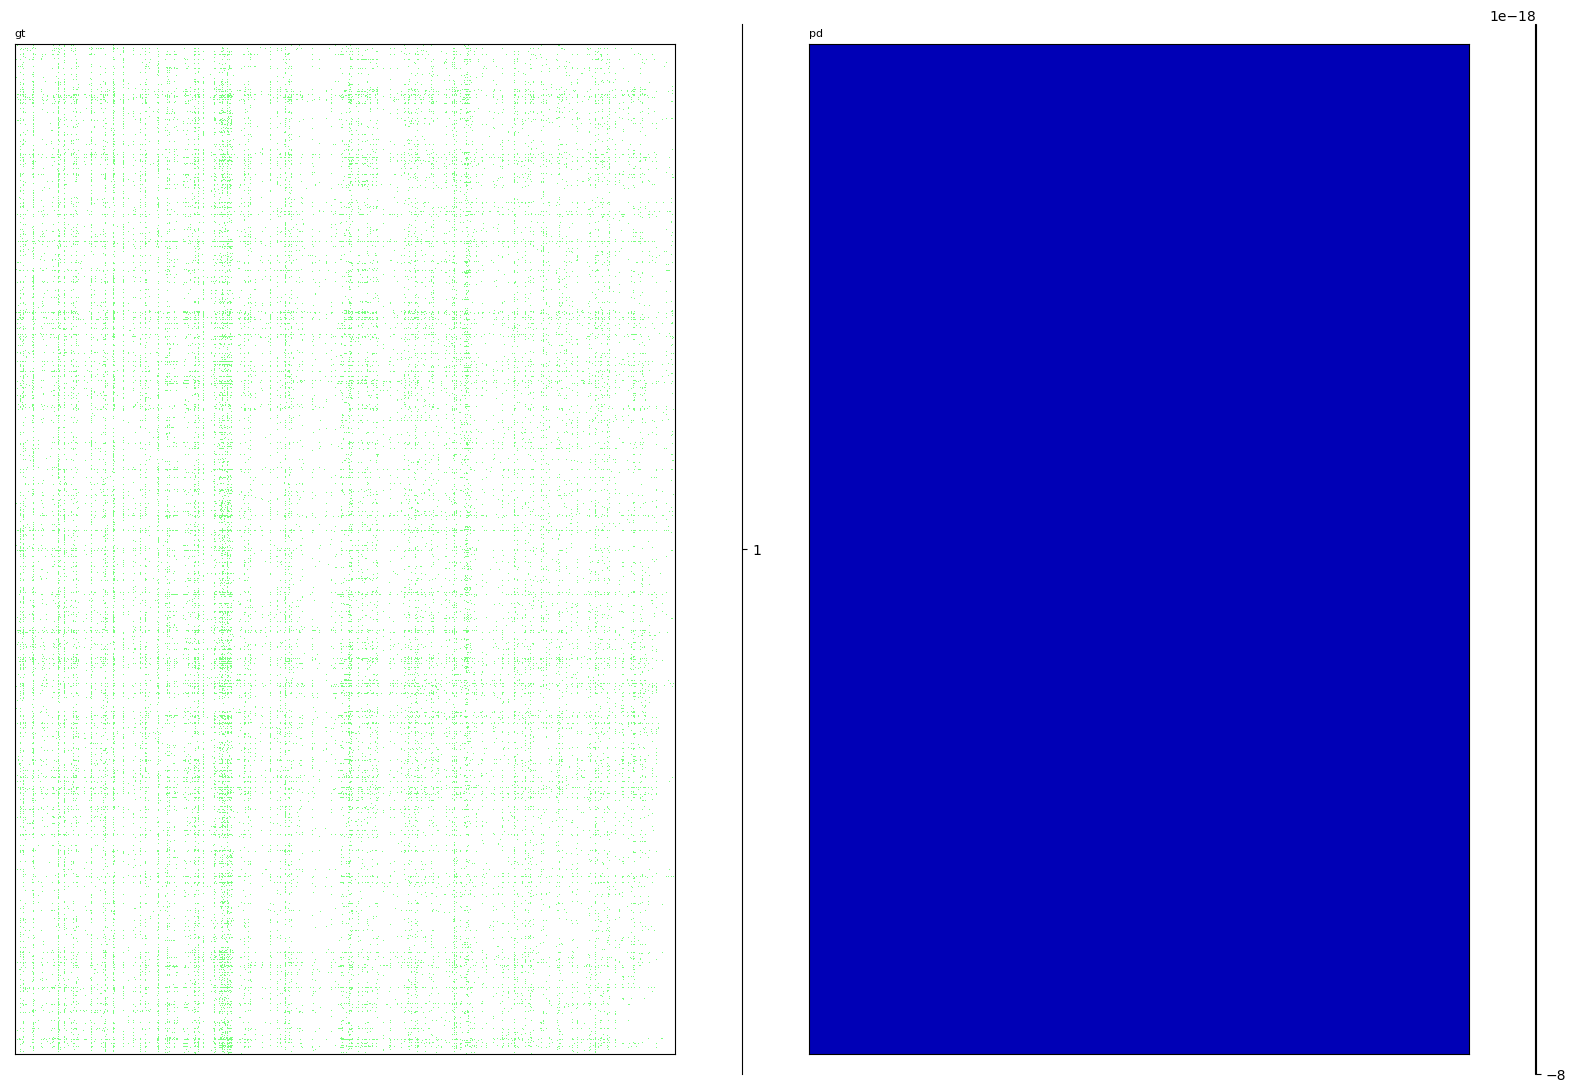

In [46]:
settings = [(R, [0, 0], 'gt'), (A @ B.T, [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True)

# cmf-1, binary, als (works)

In [4]:
R = csr_matrix((ratings['Rating'], (ratings['UserId'], ratings['ItemId'])))
R = binarize(R)

model = CMF(method="als", k=k, lambda_=lambda_, verbose=False, maxiter=maxiter, user_bias=False, item_bias=False, center=False)
model.fit(R)

Collective matrix factorization model
(explicit-feedback variant)


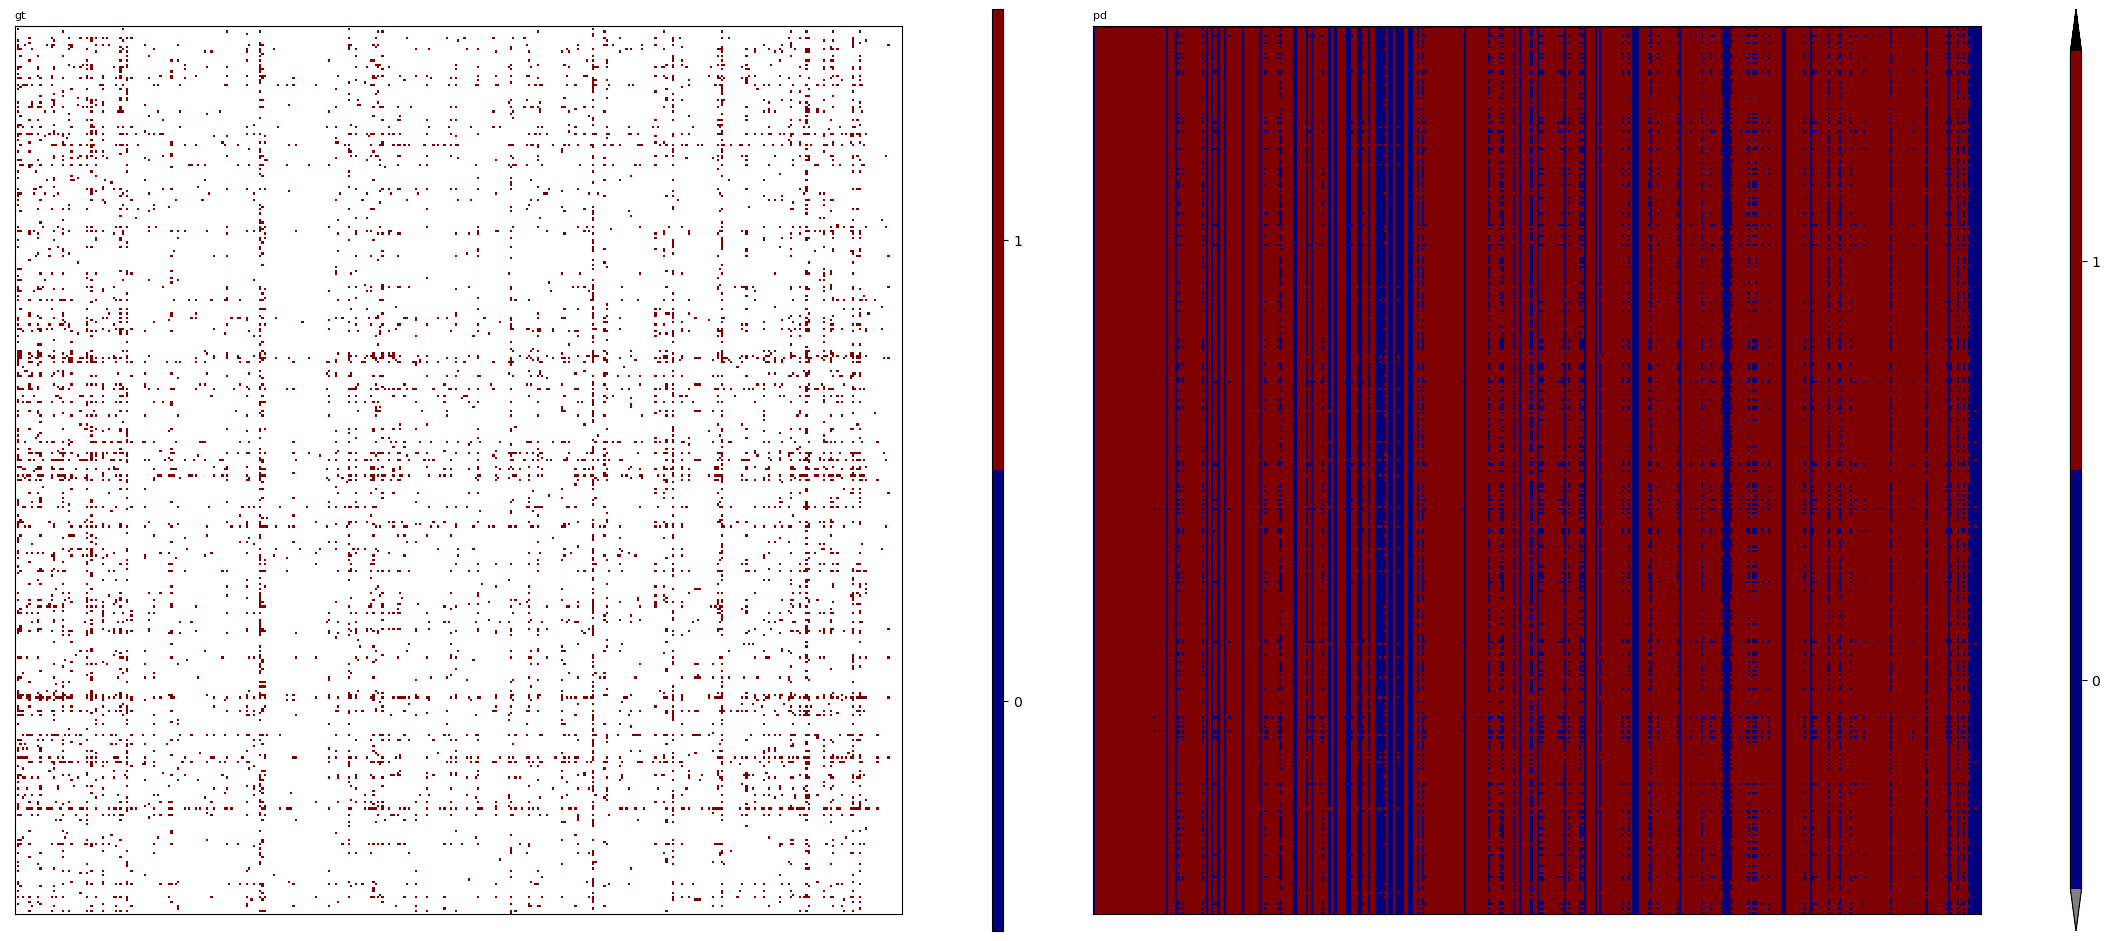

In [5]:
A, B = model.A_, model.B_
# a, b, miu = model.user_bias_, model.item_bias_, model.glob_mean_

P = A @ B.T

settings = [(R[:400, :400], [0, 0], 'gt'), (P[:400, :400], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[0, 1], discrete=True, center=True)

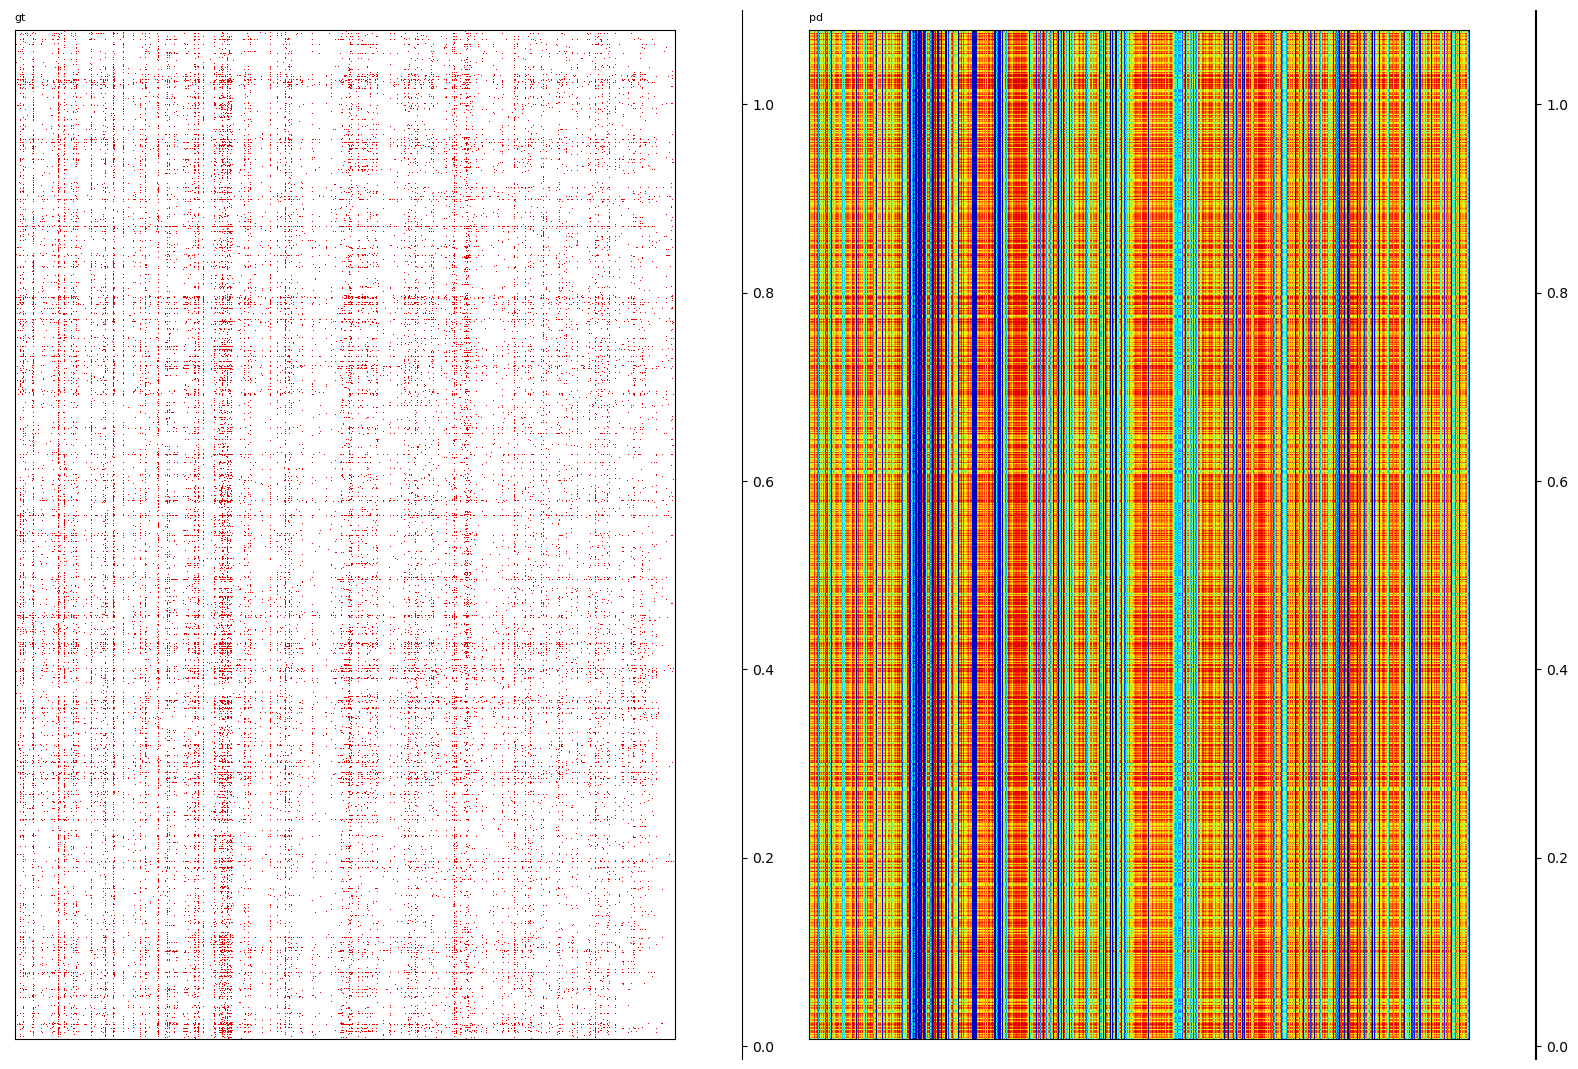

In [84]:
settings = [(R, [0, 0], 'gt'), (P, [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[P.min(), P.max()])

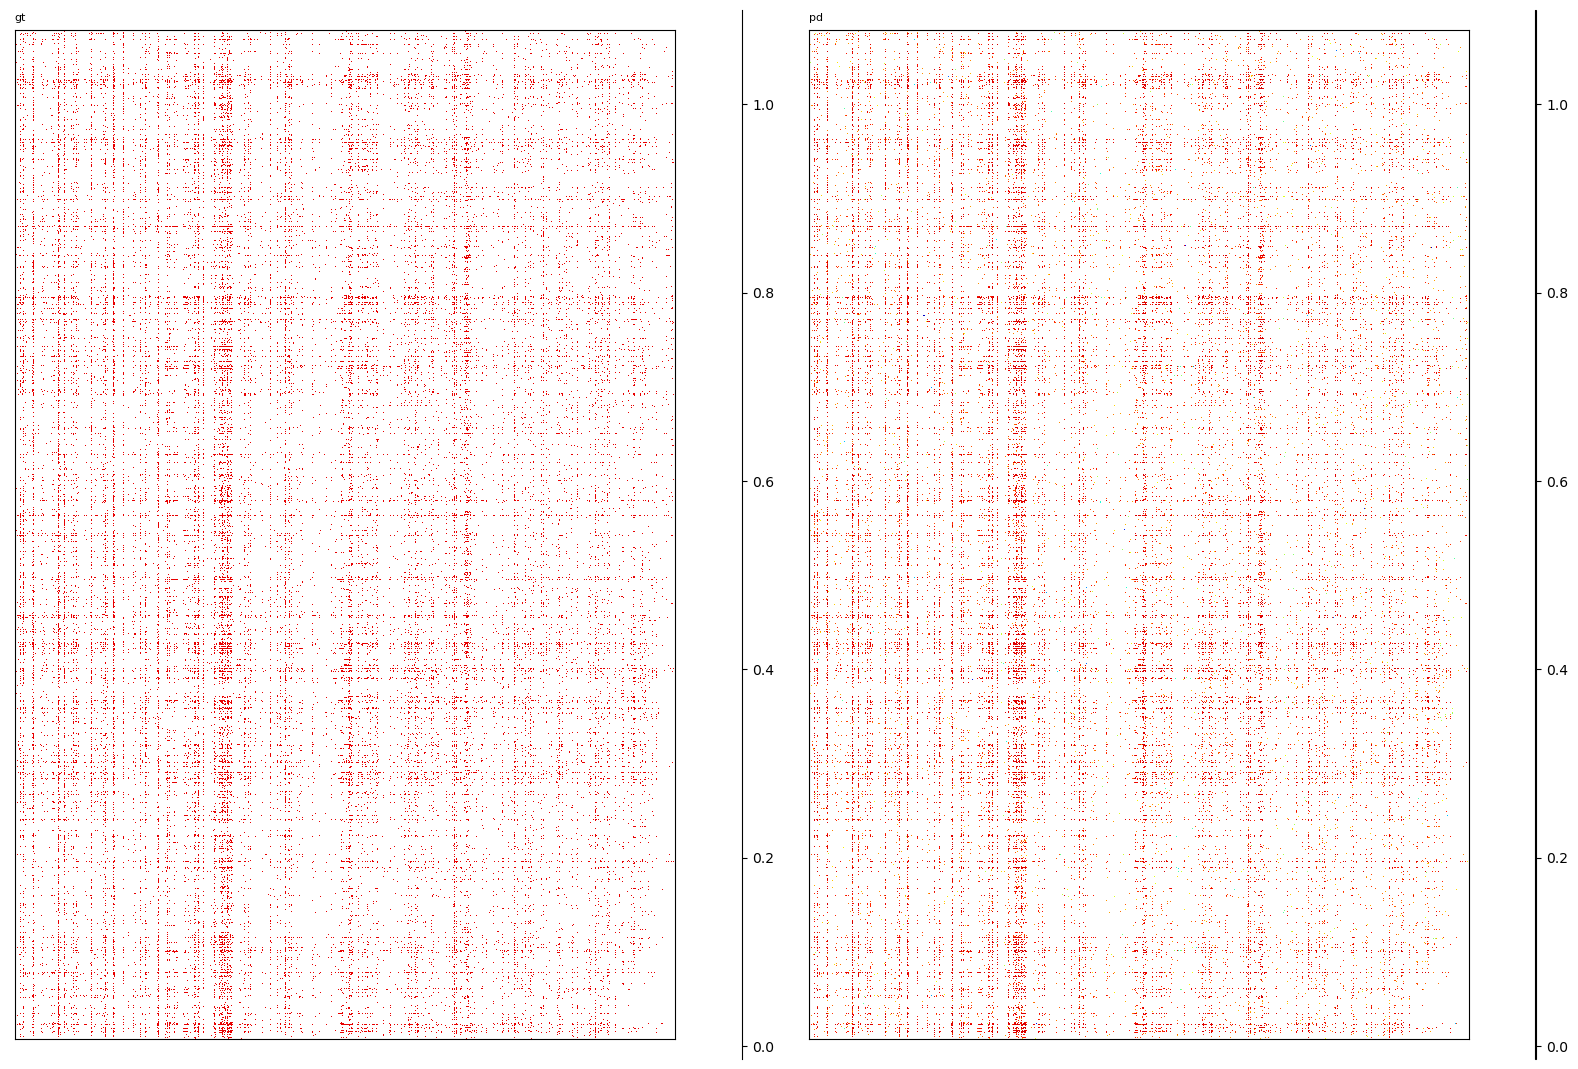

In [6]:
rows, cols = R.tocoo().row, R.tocoo().col

# values = P[rows, cols]

# X = csr_matrix((values, (rows, cols)))

X = np.empty(shape=P.shape)
X.fill(np.nan)

for i in range(len(rows)):
    X[rows[i], cols[i]] = P[rows[i], cols[i]]

X = csr_matrix(X)

settings = [(R, [0, 0], 'gt'), (X, [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[P.min(), P.max()])

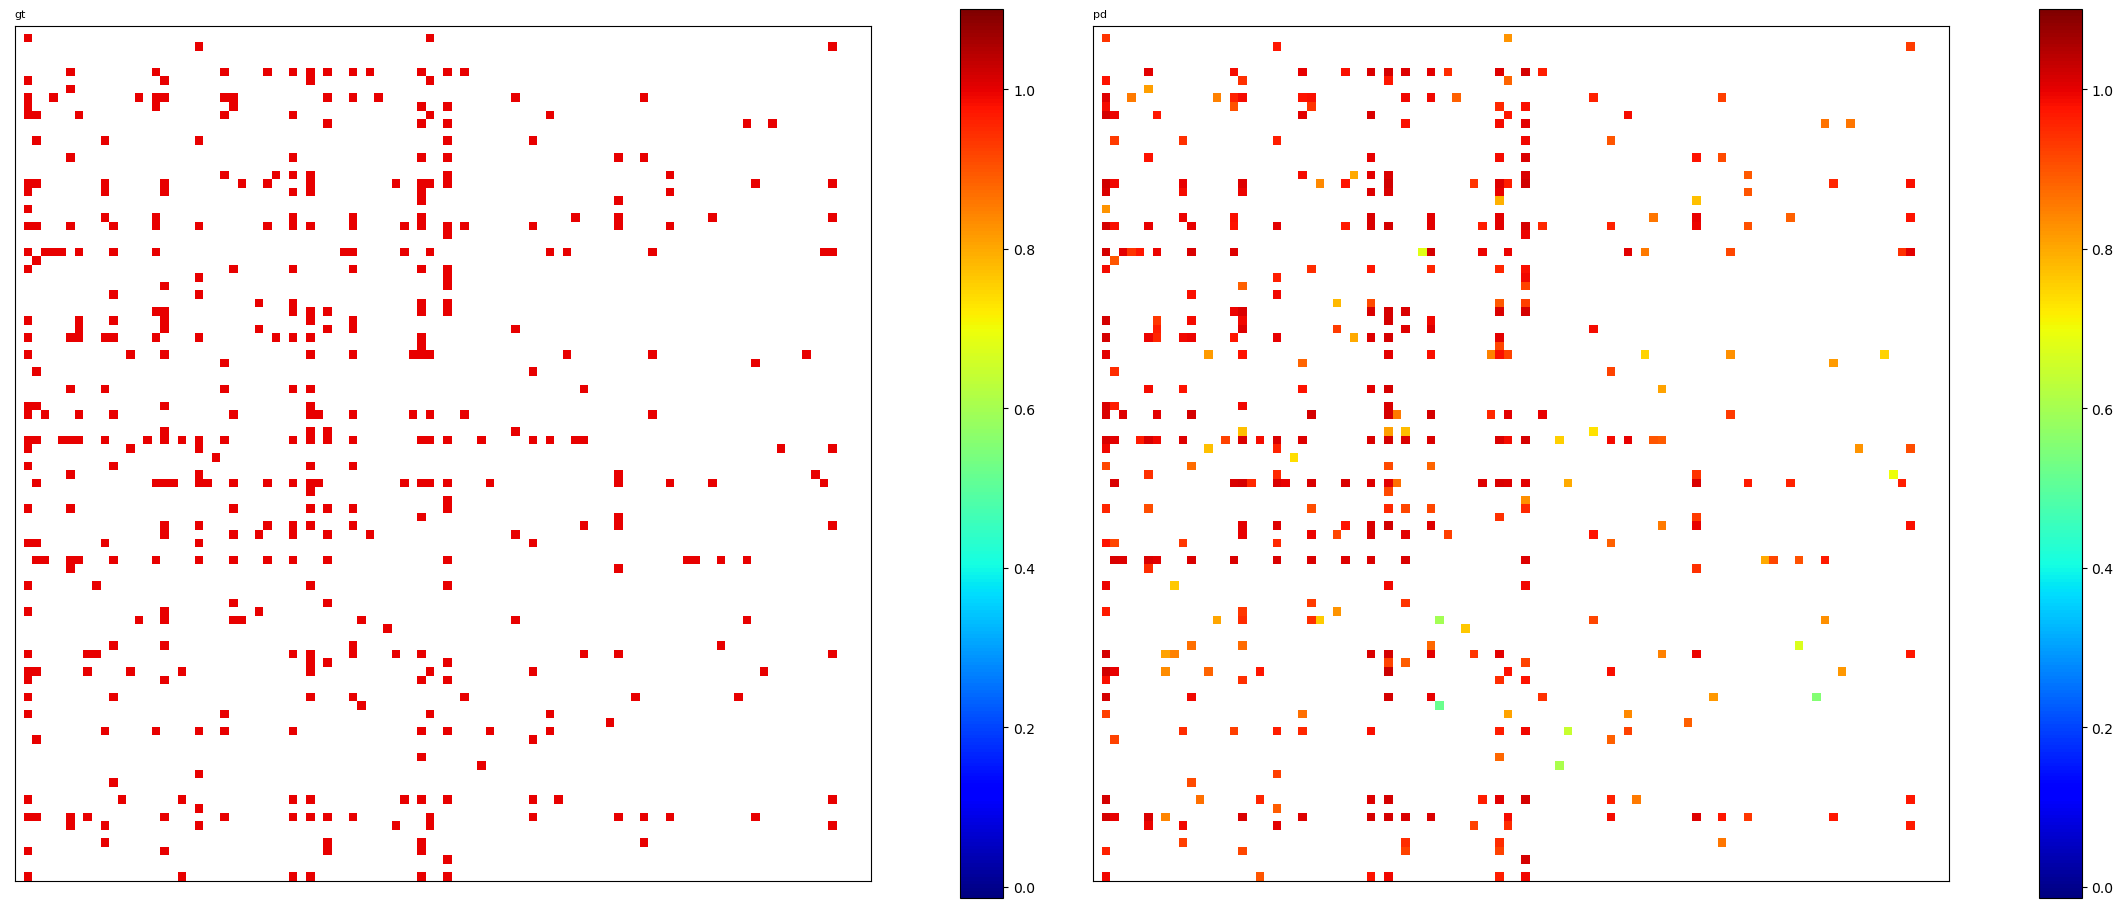

In [7]:
settings = [(R[:100, :100], [0, 0], 'gt'), (X[:100, :100], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[P.min(), P.max()])

# cmf-1, binary, lbfgs, mean

In [88]:
R = csr_matrix((ratings['Rating'], (ratings['UserId'], ratings['ItemId'])))
R = binarize(R)

model = CMF(method="lbfgs", k=k, lambda_=lambda_, verbose=False, maxiter=maxiter)
model.fit(R)

Collective matrix factorization model
(explicit-feedback variant)


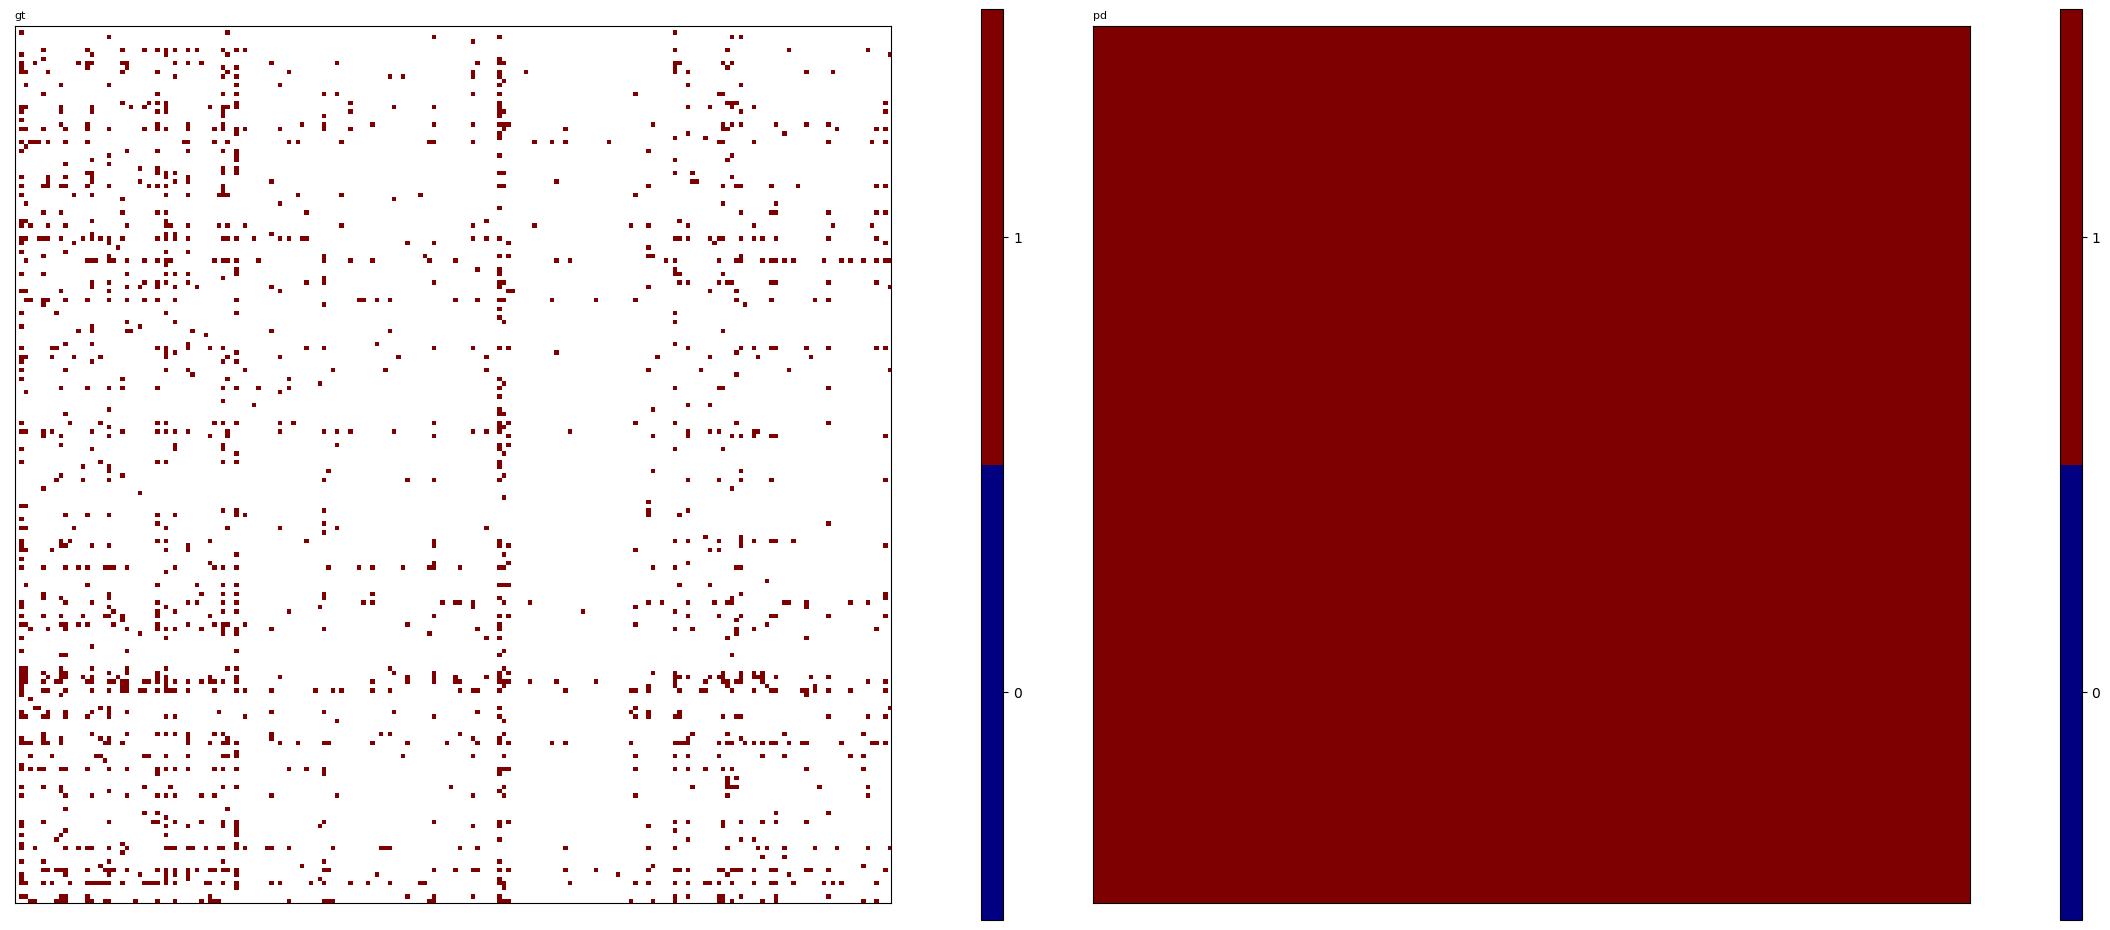

In [89]:
A, B = model.A_, model.B_
a, b, miu = model.user_bias_, model.item_bias_, model.glob_mean_

P = A @ B.T
for r in range(P.shape[0]):
    P[r, :] += a[r]
for c in range(P.shape[1]):
    P[:, c] += b[c]
P += miu

settings = [(R[:200, :200], [0, 0], 'gt'), (P[:200, :200], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[0, 1], discrete=True, center=True)

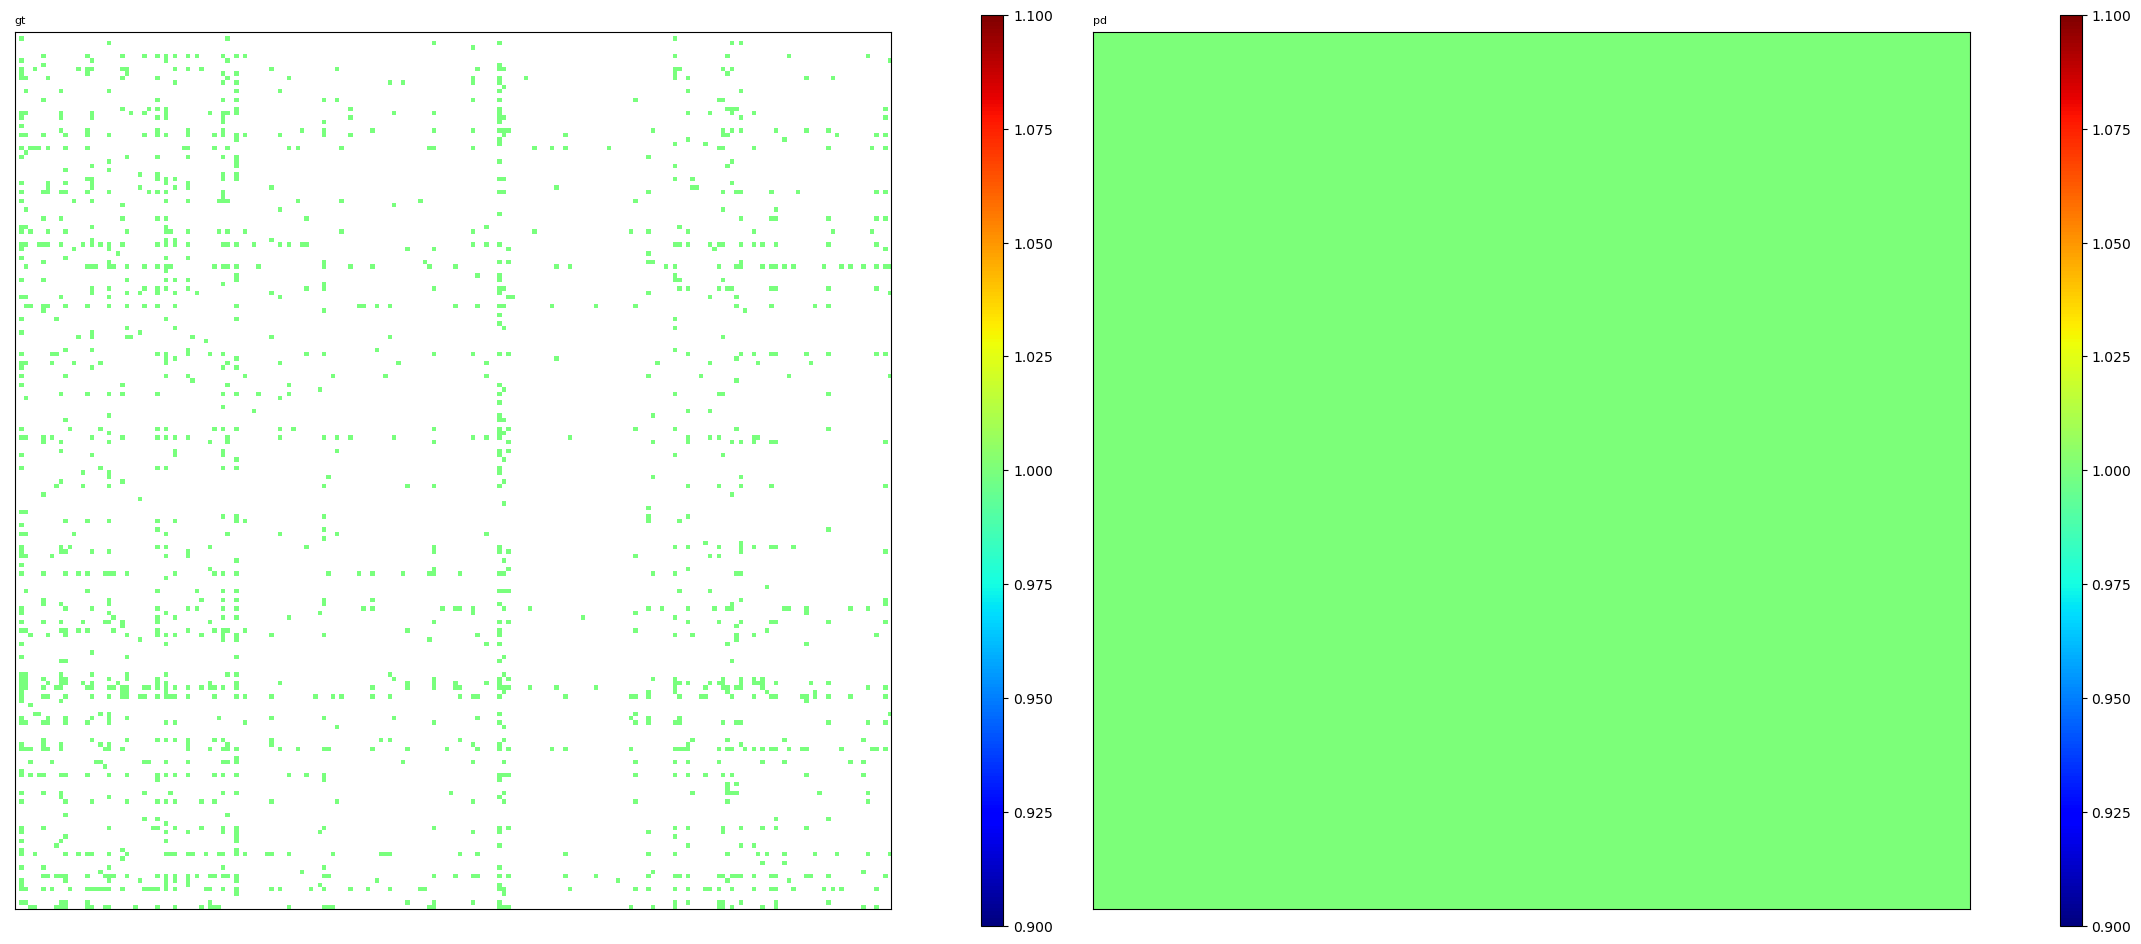

In [91]:
settings = [(R[:200, :200], [0, 0], 'gt'), (P[:200, :200], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[P.min(), P.max()], discrete=False)

# cmf-1, binary, lbfgs (works)

In [92]:
R = csr_matrix((ratings['Rating'], (ratings['UserId'], ratings['ItemId'])))
R = binarize(R)

model = CMF(method="lbfgs", k=k, lambda_=lambda_, verbose=False, maxiter=maxiter, user_bias=False, item_bias=False, center=False)
model.fit(R)

Collective matrix factorization model
(explicit-feedback variant)


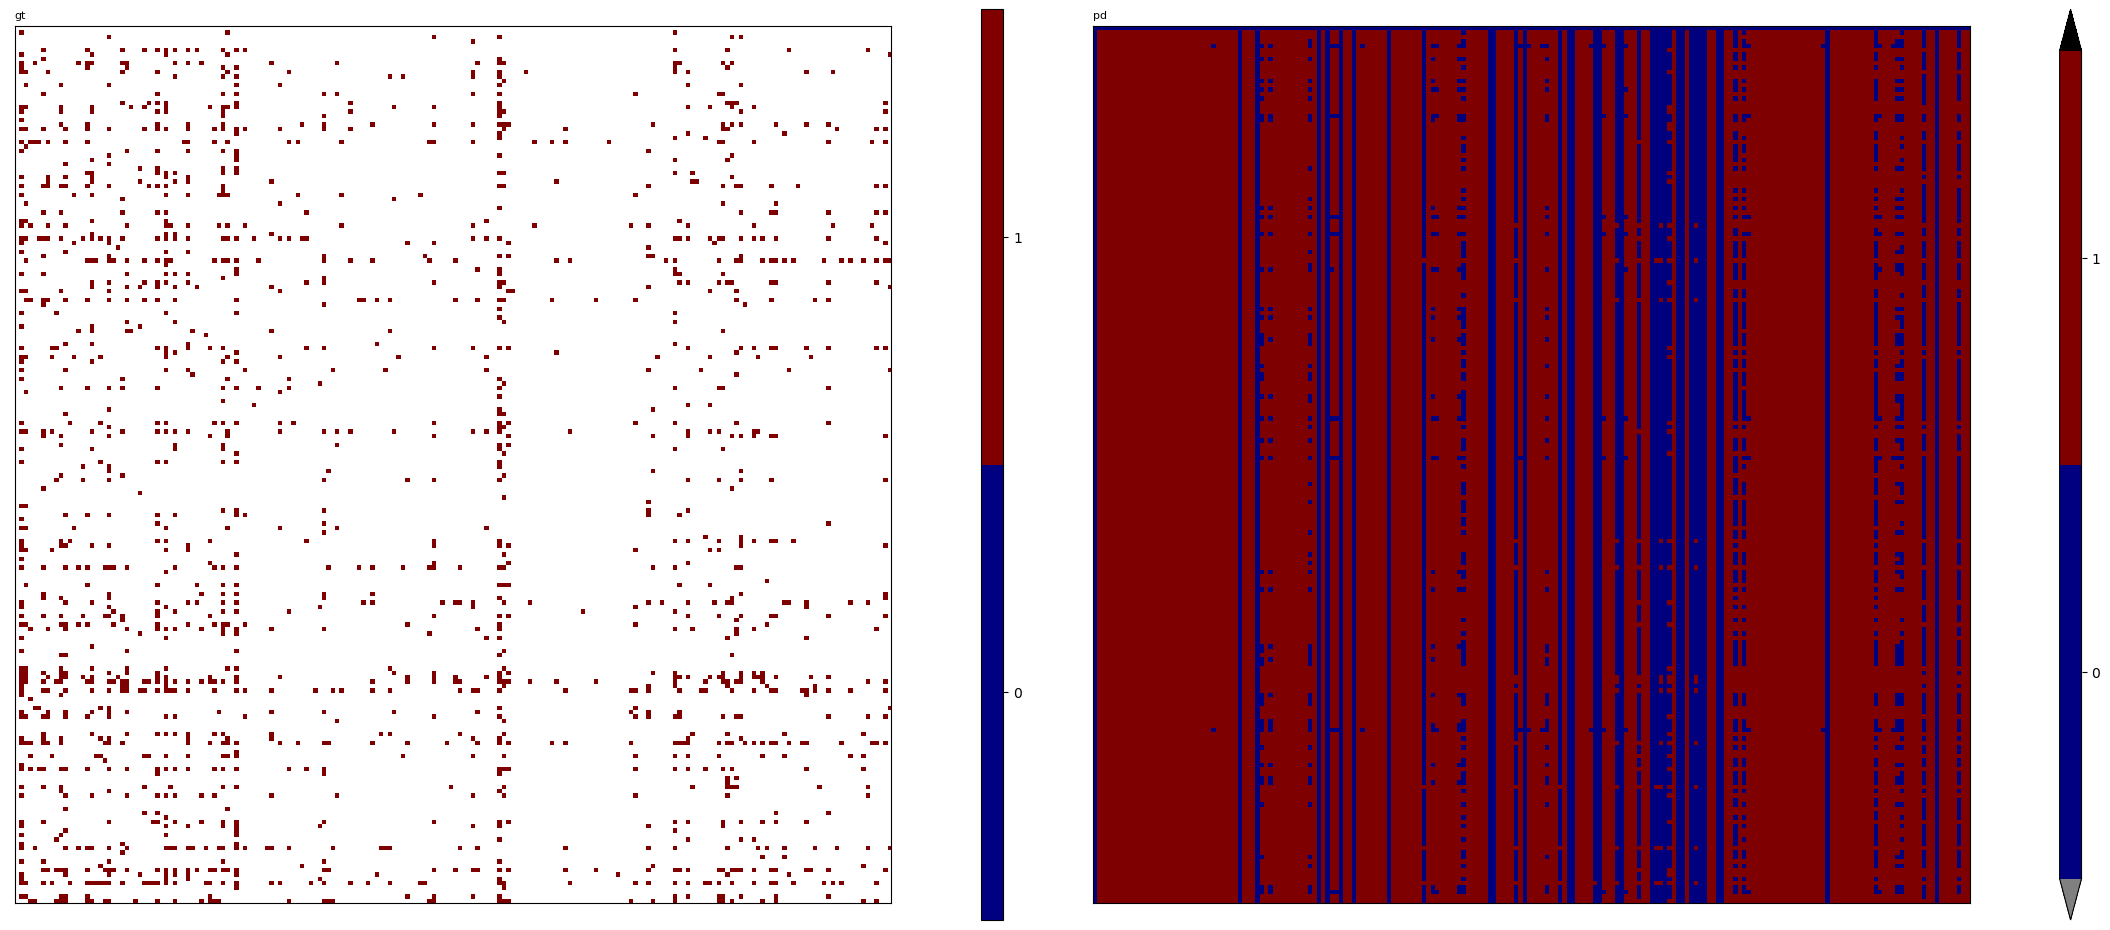

In [93]:
A, B = model.A_, model.B_

P = A @ B.T

settings = [(R[:200, :200], [0, 0], 'gt'), (P[:200, :200], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[0, 1], discrete=True, center=True)

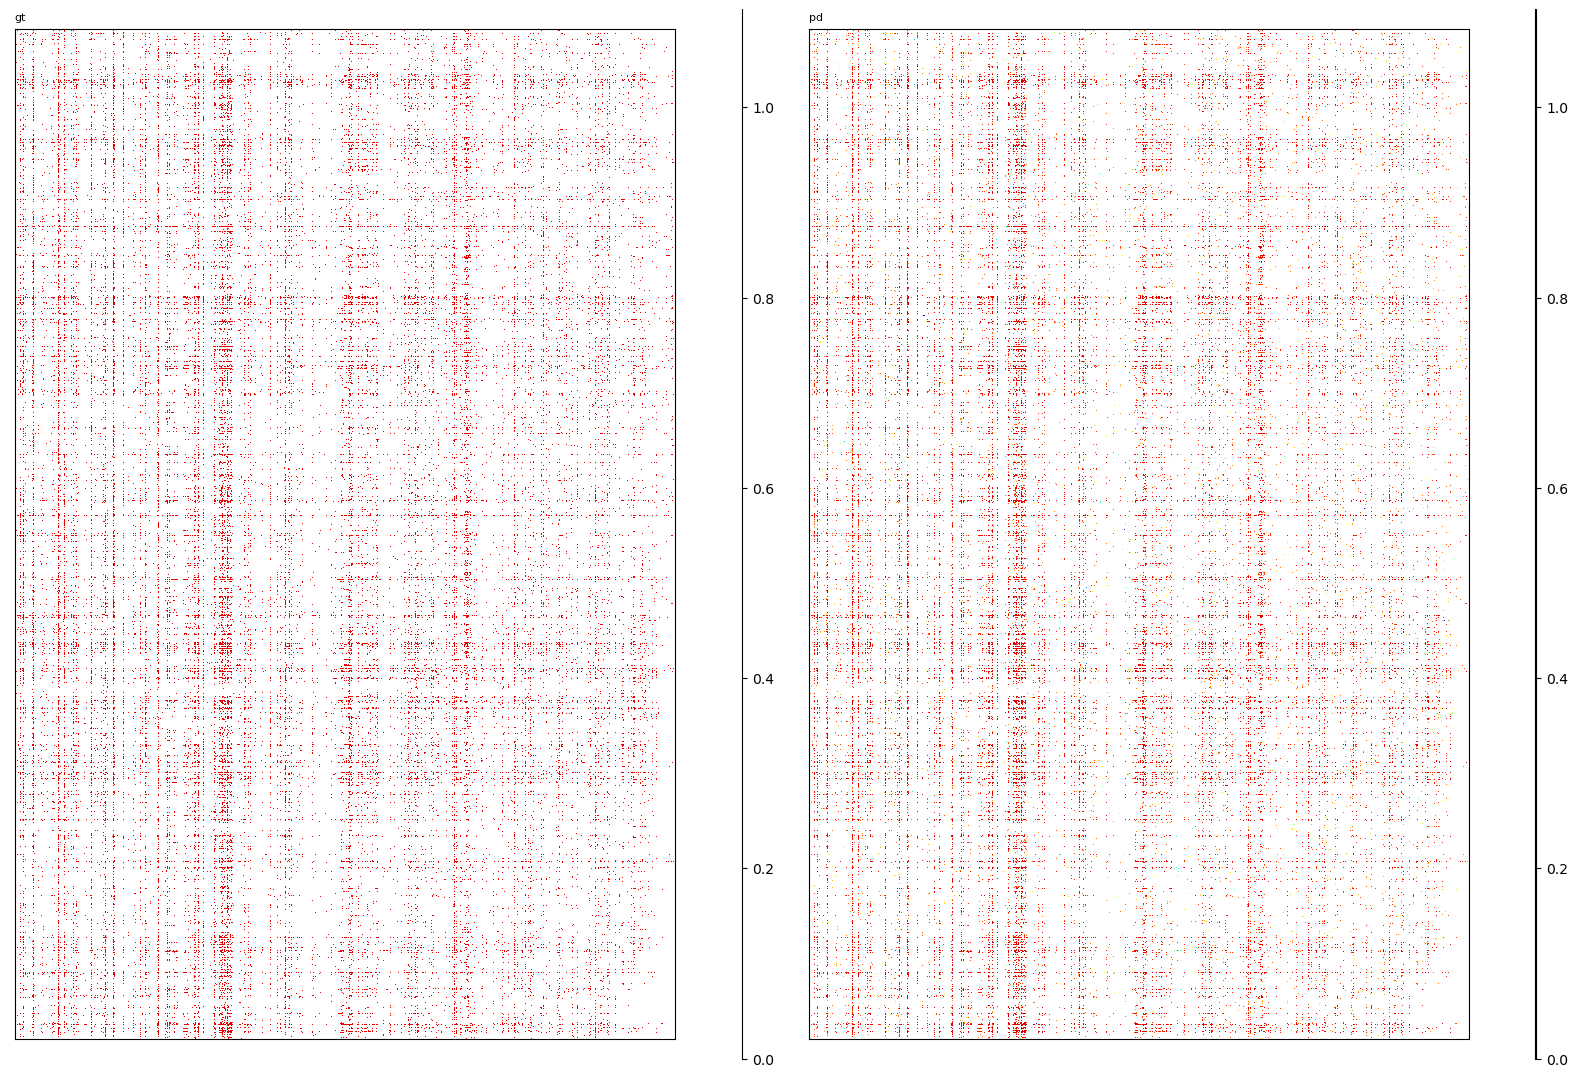

In [94]:
rows, cols = R.tocoo().row, R.tocoo().col

# values = P[rows, cols]

# X = csr_matrix((values, (rows, cols)))

X = np.empty(shape=P.shape)
X.fill(np.nan)

for i in range(len(rows)):
    X[rows[i], cols[i]] = P[rows[i], cols[i]]

X = csr_matrix(X)

settings = [(R, [0, 0], 'gt'), (X, [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[P.min(), P.max()])

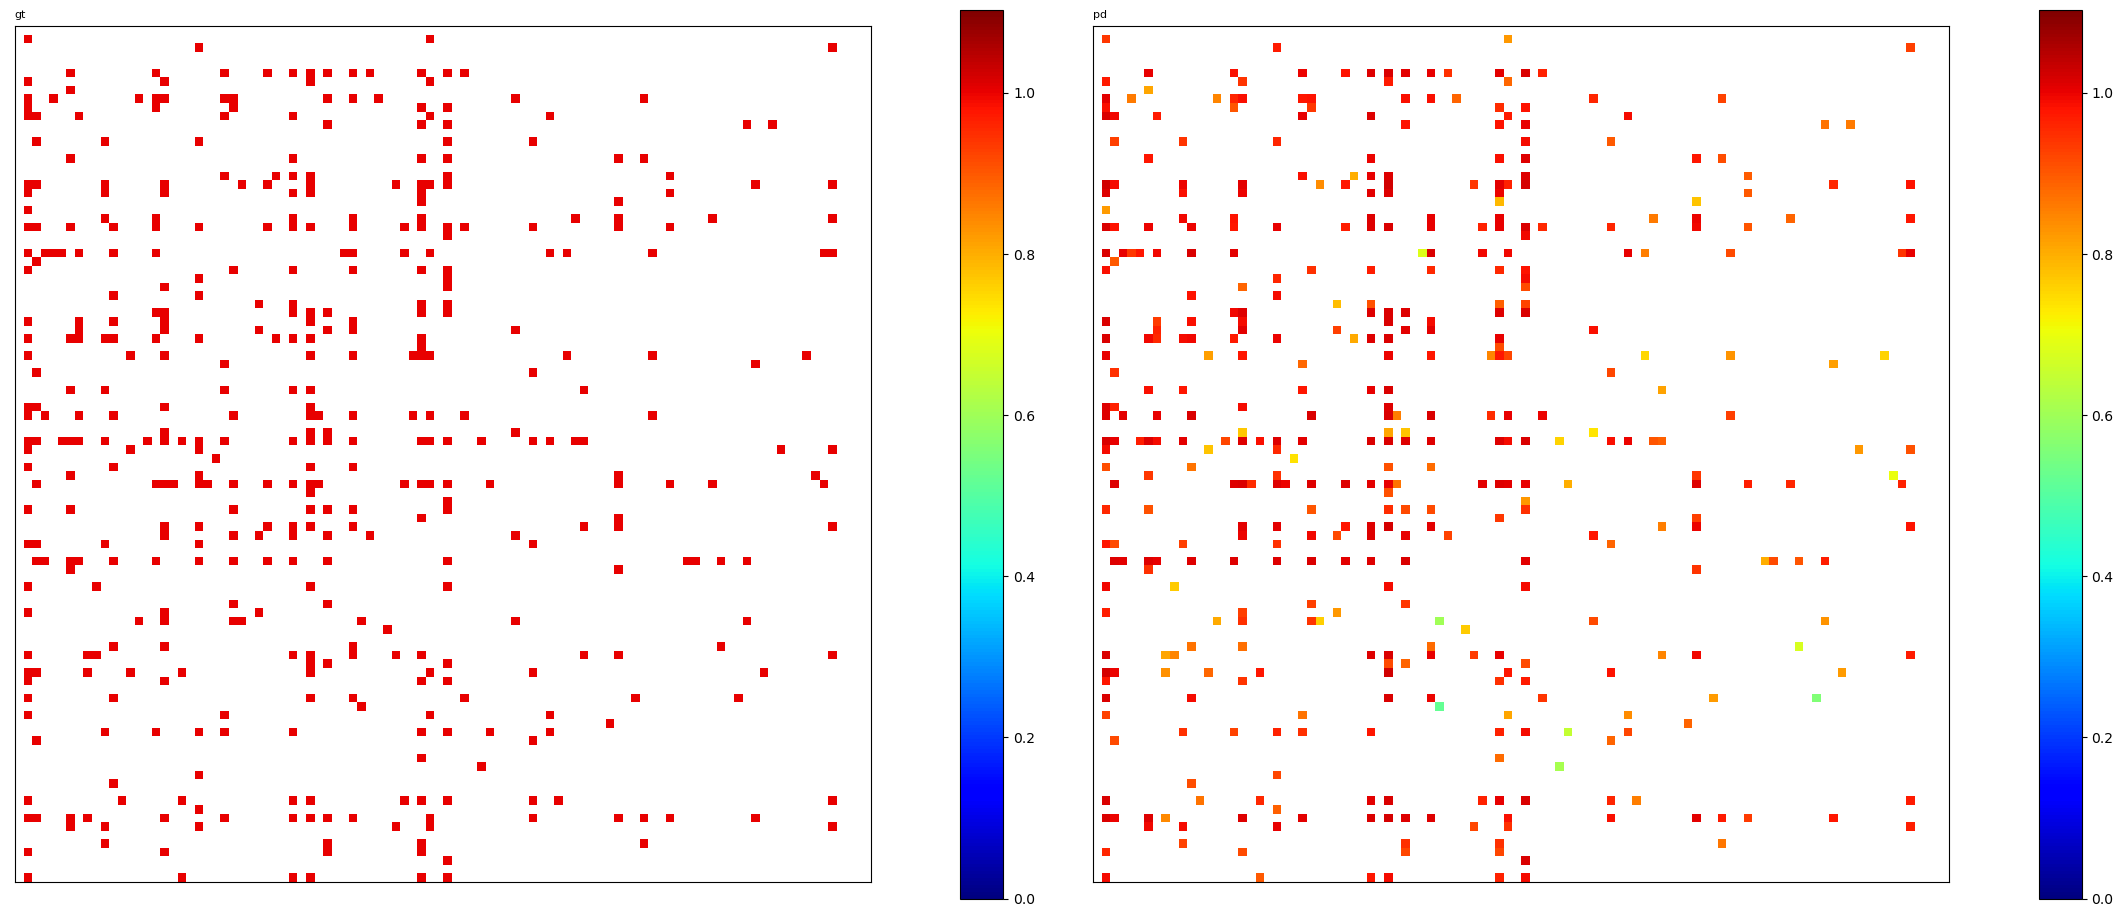

In [95]:
settings = [(R[:100, :100], [0, 0], 'gt'), (X[:100, :100], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[P.min(), P.max()])

# cmf-3, binary, als, mean

In [11]:
model = CMF(method="als", k=40, lambda_=1e+1, w_main=0.5, w_user=0.25, w_item=0.25, verbose=False)
model.fit(X=ratings, U=user_side_info, I=item_sideinfo_pca)

Collective matrix factorization model
(explicit-feedback variant)


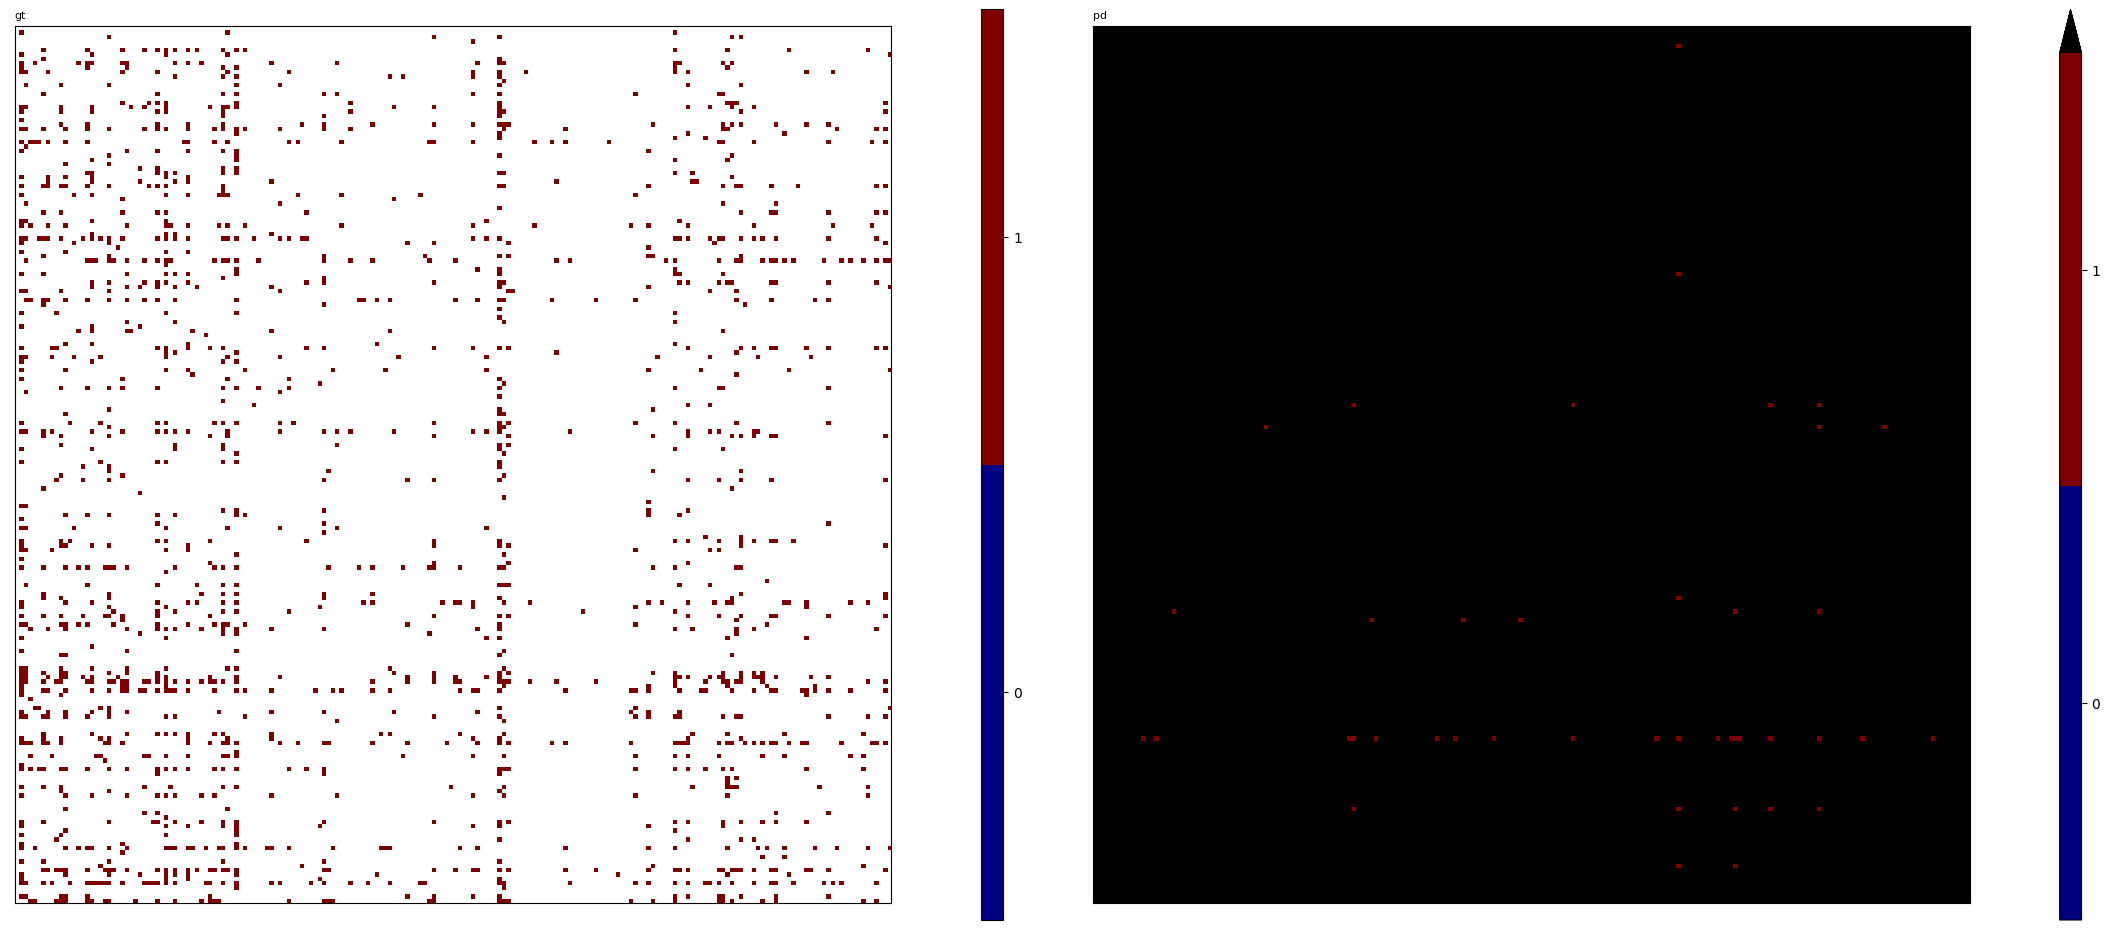

In [12]:
A, B = model.A_, model.B_
a, b, miu = model.user_bias_, model.item_bias_, model.glob_mean_

P = A @ B.T
for r in range(P.shape[0]):
    P[r, :] += a[r]
for c in range(P.shape[1]):
    P[:, c] += b[c]
P += miu

settings = [(R[:200, :200], [0, 0], 'gt'), (P[:200, :200], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[0, 1], discrete=True, center=True)

# cmf-3, binary, als

In [13]:
model = CMF(method="als", k=k, lambda_=lambda_, w_main=0.5, w_user=0.25, w_item=0.25, verbose=False, user_bias=False, item_bias=False, center=False)
model.fit(X=ratings, U=user_side_info, I=item_sideinfo_pca)

Collective matrix factorization model
(explicit-feedback variant)


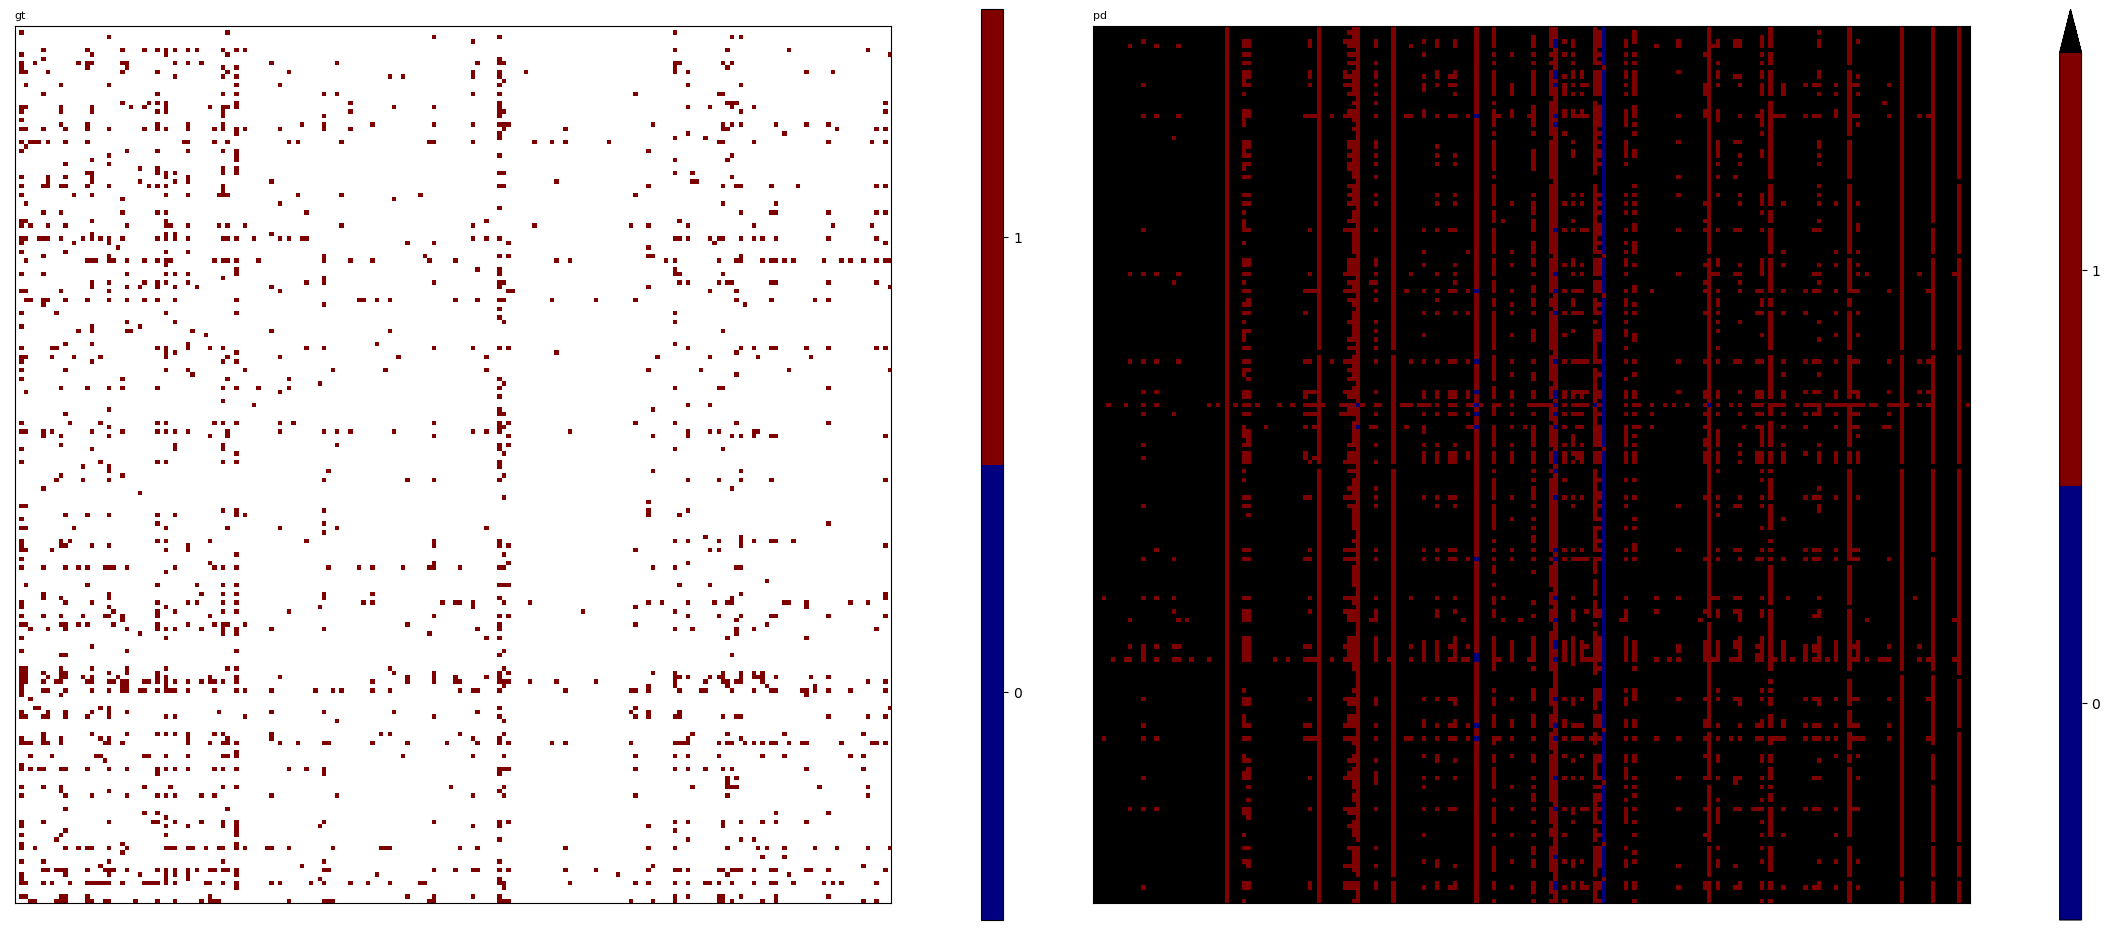

In [14]:
A, B = model.A_, model.B_

P = A @ B.T

settings = [(R[:200, :200], [0, 0], 'gt'), (P[:200, :200], [0, 1], 'pd')]
show_matrix(settings=settings, colorbar=True, clim=[0, 1], discrete=True, center=True)

# cmf-3, binary, lbfgs, mean

In [ ]:
# for the sigmoid transformations:
model = CMF(method="lbfgs", maxiter=0, k=40, lambda_=1e+1, w_main=0.5, w_user=0.25, w_item=0.25)
model.fit(X=ratings, U_bin=user_side_info, I=item_sideinfo_pca)

: 